In [1]:
note_seq = ['g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'd8', 'e8', 'f8', 'g8', 'g8', 'g4',
       'g8', 'e8', 'e8', 'e8', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4',
       'd8', 'd8', 'd8', 'd8', 'd8', 'e8', 'f4', 'e8', 'e8', 'e8', 'e8', 'e8', 'f8', 'g4',
       'g8', 'e8', 'e4', 'f8', 'd8', 'd4', 'c8', 'e8', 'g8', 'g8', 'e8', 'e8', 'e4']

In [2]:
note_seq[0:5]

['g8', 'e8', 'e4', 'f8', 'd8']

In [3]:
code2idx = {'c4':0, 'd4':1, 'e4':2, 'f4':3, 'g4':4, 'a4':5, 'b4':6,
            'c8':7, 'd8':8, 'e8':9, 'f8':10, 'g8':11, 'a8':12, 'b8':13}

In [11]:
range(len(note_seq)-4)

range(0, 50)

In [5]:
dataset = list()
for i in range(len(note_seq)-4):
  subset = note_seq[i:i+5]
  items = list()
  for item in subset:
    items.append(code2idx[item])
  dataset.append(items)

print(dataset)

[[11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 8], [8, 1, 7, 8, 9], [1, 7, 8, 9, 10], [7, 8, 9, 10, 11], [8, 9, 10, 11, 11], [9, 10, 11, 11, 4], [10, 11, 11, 4, 11], [11, 11, 4, 11, 9], [11, 4, 11, 9, 9], [4, 11, 9, 9, 9], [11, 9, 9, 9, 10], [9, 9, 9, 10, 8], [9, 9, 10, 8, 1], [9, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2], [11, 9, 9, 2, 8], [9, 9, 2, 8, 8], [9, 2, 8, 8, 8], [2, 8, 8, 8, 8], [8, 8, 8, 8, 8], [8, 8, 8, 8, 9], [8, 8, 8, 9, 3], [8, 8, 9, 3, 9], [8, 9, 3, 9, 9], [9, 3, 9, 9, 9], [3, 9, 9, 9, 9], [9, 9, 9, 9, 9], [9, 9, 9, 9, 10], [9, 9, 9, 10, 4], [9, 9, 10, 4, 11], [9, 10, 4, 11, 9], [10, 4, 11, 9, 2], [4, 11, 9, 2, 10], [11, 9, 2, 10, 8], [9, 2, 10, 8, 1], [2, 10, 8, 1, 7], [10, 8, 1, 7, 9], [8, 1, 7, 9, 11], [1, 7, 9, 11, 11], [7, 9, 11, 11, 9], [9, 11, 11, 9, 9], [11, 11, 9, 9, 2]]


In [6]:
import numpy as np

In [7]:
datasets = np.array(dataset)

In [8]:
x_train = datasets[:,0:4]
x_train.shape,

((50, 4),)

In [9]:
y_train = datasets[:,4]
y_train.shape, #y_train

((50,),)

In [12]:
len(code2idx)

14

In [14]:
x_train = x_train / 14 # len(code2idx)
x_train[0]

array([0.05612245, 0.04591837, 0.01020408, 0.05102041])

# make model

In [15]:
import tensorflow as tf

In [16]:
x_train.shape, x_train[0]

((50, 4), array([0.05612245, 0.04591837, 0.01020408, 0.05102041]))

In [17]:
X_train = np.reshape(x_train, (-1, 4, 1))
X_train.shape, X_train[0]

((50, 4, 1), array([[0.05612245],
        [0.04591837],
        [0.01020408],
        [0.05102041]]))

In [18]:
np.unique(y_train)

array([ 1,  2,  3,  4,  7,  8,  9, 10, 11])

In [19]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(4, 1)))
model.add(tf.keras.layers.LSTM(128)) # (batch_size, timesteps, input_dim)
model.add(tf.keras.layers.Dense(14, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
hist = model.fit(X_train, y_train, epochs=500, batch_size=10)

Epoch 1/500
5/5 [==============================] - 0s 7ms/step - loss: 1.0159 - accuracy: 0.6000
Epoch 2/500
5/5 [==============================] - 0s 6ms/step - loss: 1.0487 - accuracy: 0.5400
Epoch 3/500
5/5 [==============================] - 0s 6ms/step - loss: 1.0539 - accuracy: 0.6000
Epoch 4/500
5/5 [==============================] - 0s 6ms/step - loss: 1.0647 - accuracy: 0.5800
Epoch 5/500
5/5 [==============================] - 0s 6ms/step - loss: 1.0437 - accuracy: 0.5600
Epoch 6/500
5/5 [==============================] - 0s 7ms/step - loss: 1.0990 - accuracy: 0.5800
Epoch 7/500
5/5 [==============================] - 0s 6ms/step - loss: 1.0157 - accuracy: 0.6000
Epoch 8/500
5/5 [==============================] - 0s 7ms/step - loss: 1.0284 - accuracy: 0.6000
Epoch 9/500
5/5 [==============================] - 0s 7ms/step - loss: 1.0358 - accuracy: 0.5800
Epoch 10/500
5/5 [==============================] - 0s 7ms/step - loss: 1.0401 - accuracy: 0.5600
Epoch 11/500
5/5 [===========

In [62]:
model.evaluate(X_train, y_train)

2/2 [==============================] - 0s 8ms/step - loss: 1.0110 - accuracy: 0.6000


[1.0110150575637817, 0.6000000238418579]

In [50]:
X_train[0:1]

array([[[0.05612245],
        [0.04591837],
        [0.01020408],
        [0.05102041]]])

In [24]:
model.predict(X_train[0:1])

array([[2.39198078e-10, 2.53607030e-03, 1.91697896e-01, 4.80485585e-04,
        1.31548829e-02, 2.26481167e-10, 5.00262387e-10, 1.51306177e-02,
        3.62014860e-01, 2.55531371e-01, 1.08837664e-01, 5.06161116e-02,
        3.89160593e-10, 7.04866651e-11]], dtype=float32)

In [34]:
pred = model.predict(X_train[0:1])

In [35]:
np.argmax(pred)

8

In [66]:
y_pred = list()
for i in range(len(X_train)):
  pred = model.predict(X_train[i:i+1])
  arg = np.argmax(pred)
  y_pred.append(arg)
print(y_pred)

[8, 1, 7, 9, 11, 11, 9, 9, 9, 11, 2, 9, 9, 8, 9, 4, 9, 9, 11, 11, 9, 9, 2, 8, 8, 1, 8, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 4, 9, 2, 10, 8, 1, 7, 9, 11, 11, 9, 9, 2]


In [27]:
import matplotlib.pyplot as plt

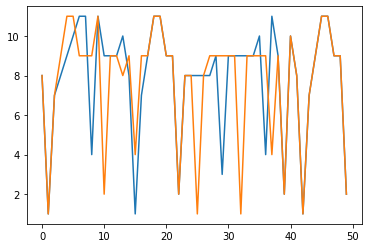

In [67]:
plt.plot(y_train)
plt.plot(y_pred)
plt.show()